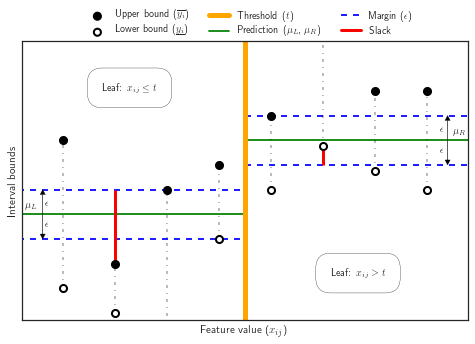

In [22]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from numpy import infty as inf
from matplotlib.lines import Line2D
from matplotlib import rc
rc('text', usetex=True)


def plot_slack(x, y, mu, epsilon, is_lower, zorder):
    slack_color = "red"
    if not is_lower and y < mu + epsilon:
        plt.vlines(x, ymin=y, ymax=mu + epsilon, color=slack_color, linewidth=3, zorder=zorder, label="Slack")
    elif is_lower and y > mu - epsilon:
        plt.vlines(x, ymin=y, ymax=mu - epsilon, color=slack_color, linewidth=3, zorder=zorder, label="Slack")

        
def plot_bound(x, y, is_lower, zorder):
    lower_style = dict(s=50, facecolors='white', edgecolors='black', linewidth=2)
    upper_style = dict(s=50, facecolors='black', edgecolors='black', linewidth=2)
    plt.scatter(x, y, zorder=zorder, 
                label=r"Lower bound ($\underline{y_i}$)" if is_lower else r"Upper bound ($\overline{y_i}$)", 
                **(lower_style if is_lower else upper_style))
        

def plot_leaf_intervals(leaf_x, leaf_y, mu):
    for i in range(len(leaf_y)):
        if not np.isinf(leaf_y[i][0]):
            plot_slack(leaf_x[i], leaf_y[i][0], mu, epsilon, True, zorder["slack"])
            plot_bound(leaf_x[i], leaf_y[i][0], True, zorder["points"])      
        if not np.isinf(leaf_y[i][1]):
            plot_slack(leaf_x[i], leaf_y[i][1], mu, epsilon, False, zorder["slack"])
            plot_bound(leaf_x[i], leaf_y[i][1], False, zorder["points"])
        plt.vlines(leaf_x[i], ymin=max(leaf_y[i][0], -99999), ymax=min(leaf_y[i][1], 99999), linestyles="-.", alpha=0.3)
    
    
def plot_separator(mu, epsilon, x_start, x_end, zorder, is_left_leaf):
    margin_color = "blue"
    separator_color = "green"
    padding = 0.5
    if is_left_leaf:
        plt.hlines(y=mu, xmin=x_start - 5 * padding, xmax=x_end + padding, color=separator_color, linestyle="-", zorder=zorder, label=r"Prediction ($\mu_L$, $\mu_R$)")
        plt.text(x=x_start - padding * 1.5, y=mu + 0.2, s=r"$\mu_L$", zorder=zorder)
                 #bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))
        plt.hlines(y=mu - epsilon, xmin=x_start - 5 * padding, xmax=x_end + padding, color=margin_color, linestyle="--", zorder=zorder, label=r"Margin ($\epsilon$)")
        plt.hlines(y=mu + epsilon, xmin=x_start - 5 * padding, xmax=x_end + padding, color=margin_color, linestyle="--", zorder=zorder)
        plt.arrow(x_start - padding * 0.8, mu, 0, epsilon - 0.2, head_width=0.1, head_length=0.2, fc='k', ec='k', zorder=zorder)
        plt.arrow(x_start - padding * 0.8, mu, 0, -epsilon + 0.2, head_width=0.1, head_length=0.2, fc='k', ec='k', zorder=zorder)
        plt.text(x_start - padding * 0.7, mu + 0.35 * epsilon, s=r"$\epsilon$", zorder=zorder)
        plt.text(x_start - padding * 0.7, mu - 0.5 * epsilon, s=r"$\epsilon$", zorder=zorder)
    else:
        plt.hlines(y=mu, xmin=x_start - padding, xmax=x_end + 5.0 * padding, color=separator_color, linestyle="-", zorder=zorder, label=r"Prediction ($\mu_L$, $\mu_R$)")
        plt.text(x=x_end + padding * 1.0, y=mu + 0.2, s=r"$\mu_R$", zorder=zorder)
        plt.hlines(y=mu - epsilon, xmin=x_start - padding, xmax=x_end + 5.0 * padding, color=margin_color, linestyle="--", zorder=zorder, label=r"Margin ($\epsilon$)")
        plt.hlines(y=mu + epsilon, xmin=x_start - padding, xmax=x_end + 5.0 * padding, color=margin_color, linestyle="--", zorder=zorder)
        plt.arrow(x_end + padding * 0.8, mu, 0, epsilon - 0.2, head_width=0.1, head_length=0.2, fc='k', ec='k', zorder=zorder)
        plt.arrow(x_end + padding * 0.8, mu, 0, -epsilon + 0.2, head_width=0.1, head_length=0.2, fc='k', ec='k', zorder=zorder)
        plt.text(x_end + padding * 0.5, mu + 0.35 * epsilon, s=r"$\epsilon$", zorder=zorder)
        plt.text(x_end + padding * 0.5, mu - 0.5 * epsilon, s=r"$\epsilon$", zorder=zorder)
    
    
def plot_split(threshold, zorder):
    plt.text(1.75, 5, r"Leaf: $x_{ij} \leq t$", bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', pad=1.5))
    plt.text(6.15, -2.5, r"Leaf: $x_{ij} > t$", bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', pad=1.5))
    plt.axvline(threshold, linewidth=5, color="orange", label=r"Threshold ($t$)", zorder=zorder)
    
    
def make_legend():
    font_properties = {}  #{'size': 12, 'style': 'normal'}
    handles, labels = plt.gca().get_legend_handles_labels()
    filtered_legend = {l: h for h, l in zip(handles, labels)}
    
    legend_keys = [r"Upper bound ($\overline{y_i}$)", r"Lower bound ($\underline{y_i}$)", r"Threshold ($t$)", r"Prediction ($\mu_L$, $\mu_R$)", r"Margin ($\epsilon$)", r"Slack"]
    plt.legend([filtered_legend[k] for k in legend_keys], legend_keys, ncol=3,
               bbox_to_anchor=(0.82, 1.01), bbox_transform=plt.gcf().transFigure, prop=font_properties)
    
    
if __name__ == "__main__":  
    plt.clf()
    
    # Figure data
    y = [(-3, 3), (-4, -2), (-inf, 1), (-1, 2), (1, 4), (2.75, inf), (1.75, 5), (1.0, 5.0)]
    x = [1, 2, 3, 4, 5, 6, 7, 8]
    mu_1 = 0.0
    mu_2 = 3.0
    epsilon = 1.0
    split_threshold = 4.5
      
    # Figure appearance
    zorder = {"points": 3,
              "separator": 1,
              "slack": 2,
              "split": 1}  # Order of parts on the z axis
    sns.set_style("white")
    plt.gcf().set_size_inches(8, 5)
    plt.xlim([0.2, 8.8])
    plt.ylim(-4.3, 7)
    plt.xlabel(r"Feature value ($x_{ij}$)")
    plt.ylabel(r"Interval bounds")
    plt.setp(plt.gca().get_xticklabels(), visible=False)
    plt.setp(plt.gca().get_yticklabels(), visible=False)
    
    # Plot separator and margin
    plot_separator(mu_1, epsilon, 1, 4, zorder["separator"], True)
    plot_separator(mu_2, epsilon, 5, 8, zorder["separator"], False)
    plot_split(split_threshold, zorder["split"])
    
    # Plot leaf intervals
    plot_leaf_intervals(x[:4], y[:4], mu_1)
    plot_leaf_intervals(x[4:], y[4:], mu_2)
    
    # Plot the legend
    make_legend()
    
    # Save to file
    plt.savefig("split_leaf_cost.pdf")
    